In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from pprint import pprint as pp
import math
from matplotlib.patches import Ellipse

In [135]:
data = pkl.load( open("/scratch/yl1363/lanmt-ebm/analysis/data_8u_16_4.pkl", "rb") )
#data = pkl.load( open("/scratch/yl1363/lanmt-ebm/analysis/data_8to12_16_4.pkl", "rb") )

In [136]:
keylist = list(data.keys())
print (keylist)

[7, 10, 14, 19, 30, 33, 44, 46, 51, 55, 56, 59, 62, 67, 68, 86, 97, 106, 110, 128, 132, 134, 137, 149, 169, 186, 218, 240, 258, 263, 275, 305, 361, 371, 398, 402, 414, 418, 451, 458, 469, 476, 479, 488, 500, 506, 509, 510, 515, 516, 523, 539, 541, 544, 548, 551, 554, 560, 569, 572, 592, 604, 607, 618, 634, 635, 637, 653, 681, 688, 691, 697, 701, 706, 708, 727, 736, 743, 753, 756, 769, 770, 777, 791, 802, 806, 817, 836, 838, 853, 858, 869, 871, 873, 876, 880, 913, 916, 921, 931, 932, 938, 950, 961, 969, 992, 1003, 1011, 1012, 1021, 1044, 1046, 1075, 1095, 1107, 1115, 1119, 1159, 1181, 1189, 1191, 1198, 1230, 1232, 1249, 1258, 1259, 1260, 1261, 1266, 1276, 1286, 1293, 1312, 1313, 1314, 1315, 1316, 1317, 1321, 1323, 1325, 1339, 1341, 1345, 1348, 1352, 1363, 1365, 1380, 1381, 1421, 1436, 1441, 1450, 1452, 1456, 1481, 1482, 1486, 1512, 1529, 1536, 1544, 1572, 1575, 1578, 1605, 1608, 1619, 1635, 1640, 1669, 1677, 1680, 1749, 1756, 1762, 1800, 1811, 1817, 1875, 1898, 1900, 1902, 1920, 1932, 1

In [137]:
unique_keys = []
for key in keylist:
    src_line = data[key]["src_line"]
    trg_line = data[key]["trg_line"]
    y_mean = data[key]["y_mean"]
    y_delta4 = data[key]["y_delta4"]
    y_sgd4 = data[key]["y_sgd4"]
    # if len( set([" ".join(delta_ys[0]), " ".join(delta_ys[-1]), " ".join(sgd_y)]) ) < 3:
    if len( set([" ".join(y_mean), " ".join(y_sgd4)]) ) < 2:
        continue
    unique_keys.append(key)
    print (key)
    print ("SRC\t", src_line.strip())
    print ("TRG\t", trg_line.strip())
    print ("MEAN\t", " ".join(y_mean))
    print ("DELTA\t", " ".join(y_delta4))
    print ("SGD\t", " ".join(y_sgd4))
    print ()
print (unique_keys)

55
SRC	 ▁Zwerg e ▁wurden ▁zu ▁Säulen .
TRG	 ▁D war ve s ▁became ▁columns .
MEAN	 <s> ▁And s s ▁were ▁too ▁columns . </s>
DELTA	 <s> ▁And e s ▁were ▁too ▁columns . </s>
SGD	 <s> ▁And e s ▁were ▁too ▁columns . </s>

59
SRC	 ▁So ▁war ▁das ▁mit ▁Symbol en .
TRG	 ▁This ▁is ▁the ▁thing ▁about ▁symbols .
MEAN	 <s> ▁So ▁that ▁was ▁with ▁the ▁symbols . </s>
DELTA	 <s> ▁So ▁that ▁was ▁with ▁the ▁symbols . </s>
SGD	 <s> ▁So ▁that ▁was ▁with ▁with ▁symbols . </s>

67
SRC	 ▁Aber ▁dann ▁passierte ▁etwas ▁Überraschend es .
TRG	 ▁And ▁then , ▁something ▁amazing ▁happened .
MEAN	 <s> ▁But ▁then ▁something ▁happened ▁surprising ▁happened . </s>
DELTA	 <s> ▁But ▁then ▁something ▁happened ▁surprising ▁happened . </s>
SGD	 <s> ▁But ▁then ▁something ▁something ▁surprising ▁happened . </s>

137
SRC	 ▁Denn ▁anscheinend ▁tun ▁wir ▁das ▁nicht .
TRG	 ▁Because ▁apparently ▁we ▁don ' t .
MEAN	 <s> ▁Because ▁we ▁don ' t ▁that . </s>
DELTA	 <s> ▁Because ▁we ▁don ' t ▁do . </s>
SGD	 <s> ▁Because ▁we ▁don ' t ▁do . </

In [138]:
a="""
for key in unique_keys:
    src_line = data[key]["src_line"]
    trg_line = data[key]["trg_line"]

    y_mean = data[key]["y_mean"]
    y_delta4 = data[key]["y_delta4"]
    y_sgd4 = data[key]["y_sgd4"]

    z0 = data[key]["z0"]
    #z_stddev = data[key]["z_stddev"]
    z_sgd_list = data[key]["z_sgd_list"]
    z_score_list = data[key]["z_score_list"]
    z_delta_list = data[key]["z_delta_list"]

    all_grads = data[key]["all_grads"]
    z_grids = data[key]["z_grids"]
    targets_length = len(y_sgd4)
    
    ncols = 4
    nfigs = targets_length-2
    nrows = int(math.ceil(nfigs / float(ncols)))
    figsize = 16
    spacing = 1
    fontsize=60
    markersize=40

    left = 0.125  # the left side of the subplots of the figure
    right = 0.9   # the right side of the subplots of the figure
    bottom = 0.1  # the bottom of the subplots of the figure
    top = 0.9     # the top of the subplots of the figure
    wspace = 0.25  # the amount of width reserved for space between subplots,
                  # expressed as a fraction of the average axis width
    hspace = 0.50  # the amount of height reserved for space between subplots,
                  # expressed as a fraction of the average axis height
    #scale=20
    #quiverdict={"scale":scale}
    quiverdict={"units":'xy', "angles":'xy'}

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figsize * ncols, figsize * nrows))
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

    for idx in range(targets_length):
        if idx == 0 or idx == targets_length - 1 :
            continue
        X, Y = z_grids[:, :, idx, 0], z_grids[:, :, idx, 1]
        U, V = all_grads[:, :, idx, 0], all_grads[:, :, idx, 1]
        X, Y = X[::spacing, ::spacing], Y[::spacing, ::spacing]
        U, V = U[::spacing, ::spacing], V[::spacing, ::spacing]

        row_idx = (idx-1) // ncols
        col_idx = (idx-1) % ncols

        q = axes[row_idx][col_idx].quiver(X, Y, U, V, **quiverdict)
        X1 = np.stack([z0[0, idx, 0]] + [z_sgd_list[ii][0, idx, 0] for ii in range(3)], axis=0)
        Y1 = np.stack([z0[0, idx, 1]] + [z_sgd_list[ii][0, idx, 1] for ii in range(3)], axis=0)
        U1 = np.stack([z_score_list[ii][0, idx, 0] for ii in range(4)], axis=0)
        V1 = np.stack([z_score_list[ii][0, idx, 1] for ii in range(4)], axis=0)
        q1 = axes[row_idx][col_idx].quiver(X1, Y1, U1, V1, **quiverdict)
        x0, y0 = z0[0, idx, 0], z0[0, idx, 1]
        title = "{}\nMean: {}\nDelta: {}\nSGD: {}".format(idx, y_mean[idx], y_delta4[idx], y_sgd4[idx])
        axes[row_idx][col_idx].set_title(title, fontsize=fontsize)
        axes[row_idx][col_idx].plot(x0, y0, 'o', color='red', markersize=markersize)
        for step_idx in range(4):
            xx, yy = z_delta_list[step_idx][0, idx, 0], z_delta_list[step_idx][0, idx, 1]
            axes[row_idx][col_idx].plot(xx, yy, 'o', color='blue', markersize=markersize, alpha = 0.8 ** step_idx)
        for step_idx in range(4):
            xx, yy = z_sgd_list[step_idx][0, idx, 0], z_sgd_list[step_idx][0, idx, 1]
            axes[row_idx][col_idx].plot(xx, yy, 'o', color='green', markersize=markersize, alpha = 0.8 ** step_idx)


    print ("SRC\t", src_line.strip())
    print ("TRG\t", trg_line.strip())
    print ("MEAN\t", " ".join(y_mean[1:-1]))
    print ("DELTA\t", " ".join(y_delta4[1:-1]))
    print ("SGD\t", " ".join(y_sgd4[1:-1]))
    print ()
    plt.show()
    import ipdb; ipdb.set_trace()
"""

In [139]:
#keys =  [722, 803, 914, 945, 952, 1384] 
#key = 945
#keys =  [154, 1717, 1703, 1515, 2177, 2122, 1947, 1568, 1350, 1008, 999, 951, 768, 579, 465, 437] 
#key = 465

keys =  [149, 240, 1115, 1512] 
key = 240
# key = 1578

src_line = data[key]["src_line"]
trg_line = data[key]["trg_line"]

y_mean = data[key]["y_mean"]
y_delta4 = data[key]["y_delta4"]
y_sgd4 = data[key]["y_sgd4"]

z0 = data[key]["z0"]
#z_stddev = data[key]["z_stddev"]
z_sgd_list = data[key]["z_sgd_list"]
z_score_list = data[key]["z_score_list"]
z_delta_list = data[key]["z_delta_list"]

all_grads = data[key]["all_grads"]
z_grids = data[key]["z_grids"]
targets_length = len(y_sgd4)
print (targets_length)

8


In [140]:
print (z_grids.shape)
print (all_grads.shape)

(25, 25, 8, 2)
(25, 25, 8, 2)


SRC	 ▁Was ▁öffnete ▁mir ▁also ▁die ▁Augen ?
TRG	 ▁So ▁what ▁opened ▁my ▁eyes ?
MEAN	 ▁So ▁what ▁opened ▁me ▁eyes ?
DELTA	 ▁So ▁what ▁opened ▁me ▁eyes ?
SGD	 ▁So ▁what ▁opened ▁my ▁eyes ?



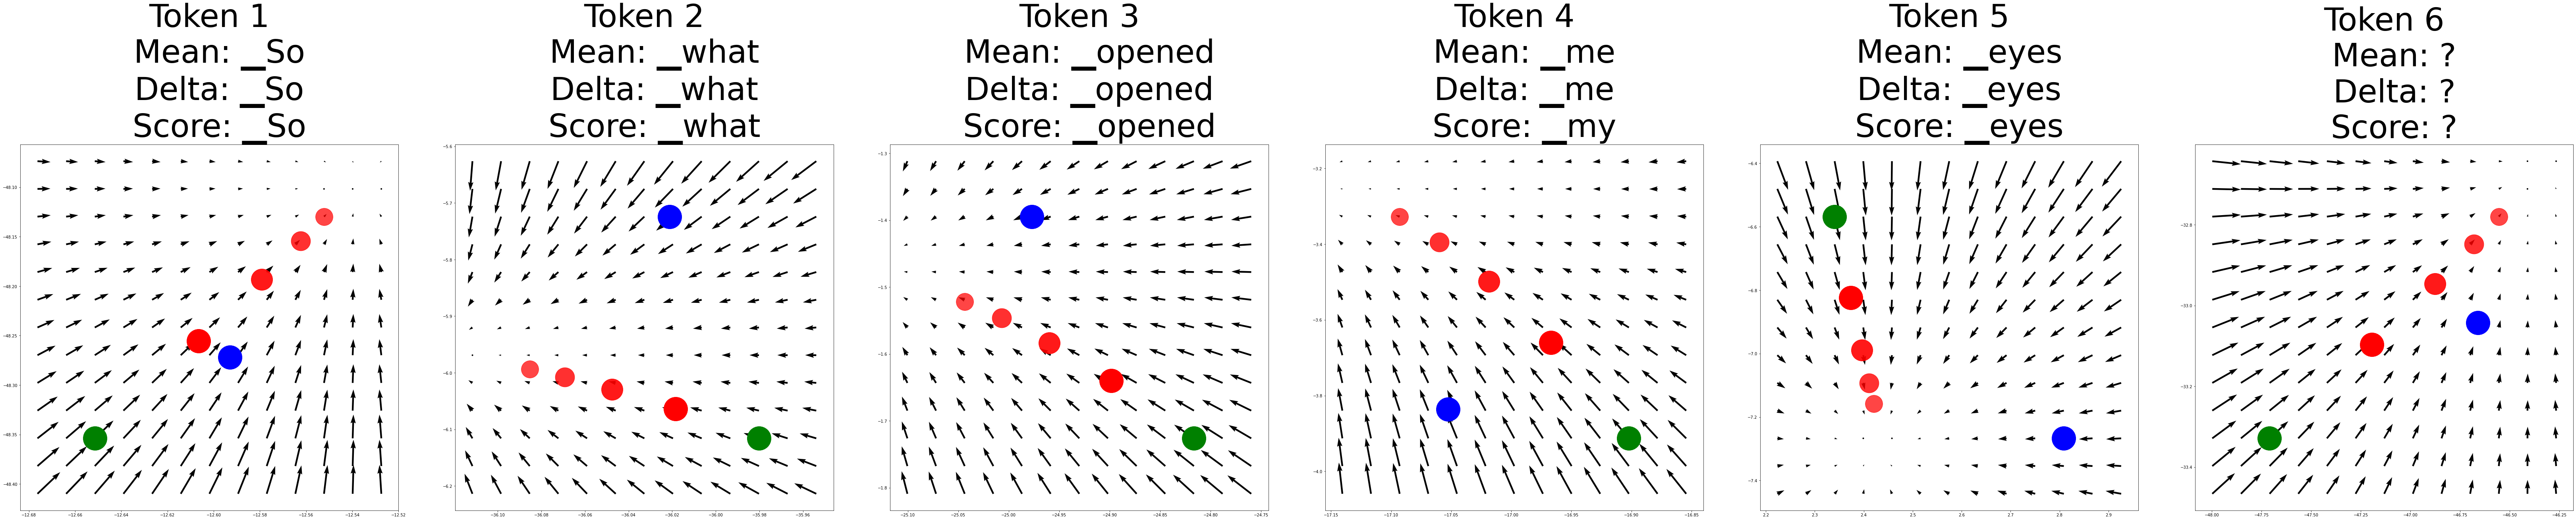

In [141]:
ncols = 6
nfigs = targets_length-2
nrows = int(math.ceil(nfigs / float(ncols)))
figsize = 16
spacing = 2
fontsize=80
markersize=60

left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.1  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.15  # the amount of width reserved for space between subplots,
              # expressed as a fraction of the average axis width
hspace = 0.50  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
#scale=20
#quiverdict={"scale":scale}
quiverdict={"units":'xy', "angles":'xy'}

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figsize * ncols * 1.2, figsize * nrows))
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

for idx in range(targets_length):
    if idx == 0 or idx == targets_length - 1 :
        continue
    X, Y = z_grids[:, :, idx, 0], z_grids[:, :, idx, 1]
    U, V = all_grads[:, :, idx, 0], all_grads[:, :, idx, 1]
    X, Y = X[::spacing, ::spacing], Y[::spacing, ::spacing]
    U, V = U[::spacing, ::spacing], V[::spacing, ::spacing]
    
    row_idx = (idx-1) // ncols
    col_idx = (idx-1) % ncols
    
    if nrows == 1:
        ax = axes[col_idx]
    else:
        ax = axes[row_idx][col_idx]

    q = ax.quiver(X, Y, U, V, **quiverdict)

    bb="""
    X1 = np.stack([z0[0, idx, 0]] + [z_sgd_list[ii][0, idx, 0] for ii in range(3)], axis=0)
    Y1 = np.stack([z0[0, idx, 1]] + [z_sgd_list[ii][0, idx, 1] for ii in range(3)], axis=0)
    U1 = np.stack([z_score_list[ii][0, idx, 0] for ii in range(4)], axis=0)
    V1 = np.stack([z_score_list[ii][0, idx, 1] for ii in range(4)], axis=0)
    q1 = ax.quiver(X1, Y1, U1, V1, **quiverdict)
    """
    
    x0, y0 = z0[0, idx, 0], z0[0, idx, 1]
    title = "Token {}\n  Mean: {}\n  Delta: {}\n  Score: {}".format(idx, y_mean[idx], y_delta4[idx], y_sgd4[idx])
    if idx == 4:
        ax.set_title(title, fontsize=fontsize, color="black")
    else:
        ax.set_title(title, fontsize=fontsize)        
    ax.plot(x0, y0, 'o', color='green', markersize=markersize)
    for step_idx in range(4):
        xx, yy = z_delta_list[step_idx][0, idx, 0], z_delta_list[step_idx][0, idx, 1]
        ax.plot(xx, yy, 'o', color='blue', markersize=markersize * (0.9 ** step_idx), alpha = 0.9 ** step_idx)
    for step_idx in range(4):
        xx, yy = z_sgd_list[step_idx][0, idx, 0], z_sgd_list[step_idx][0, idx, 1]
        ax.plot(xx, yy, 'o', color='red', markersize=markersize * (0.9 ** step_idx), alpha = 0.9 ** step_idx)


print ("SRC\t", src_line.strip())
print ("TRG\t", trg_line.strip())
print ("MEAN\t", " ".join(y_mean[1:-1]))
print ("DELTA\t", " ".join(y_delta4[1:-1]))
print ("SGD\t", " ".join(y_sgd4[1:-1]))
print ()
plt.show()

In [142]:
fig.savefig("/scratch/yl1363/lanmt-ebm/analysis/figs/iwslt-{}.pdf".format(key), quality=100, facecolor='w', edgecolor='w',
        orientation='landscape', format='pdf', papertype=None,
        transparent=False, bbox_inches='tight', pad_inches=0.2,
        metadata=None)
